In [12]:
import librosa
import numpy as np

In [4]:
# Load the audio file
AUDIO_FILE = 'C:/Users/merlab-jani/survey_voices/meg_griffin.mp3'
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)

In [5]:
import librosa.display
import matplotlib.pyplot as plt

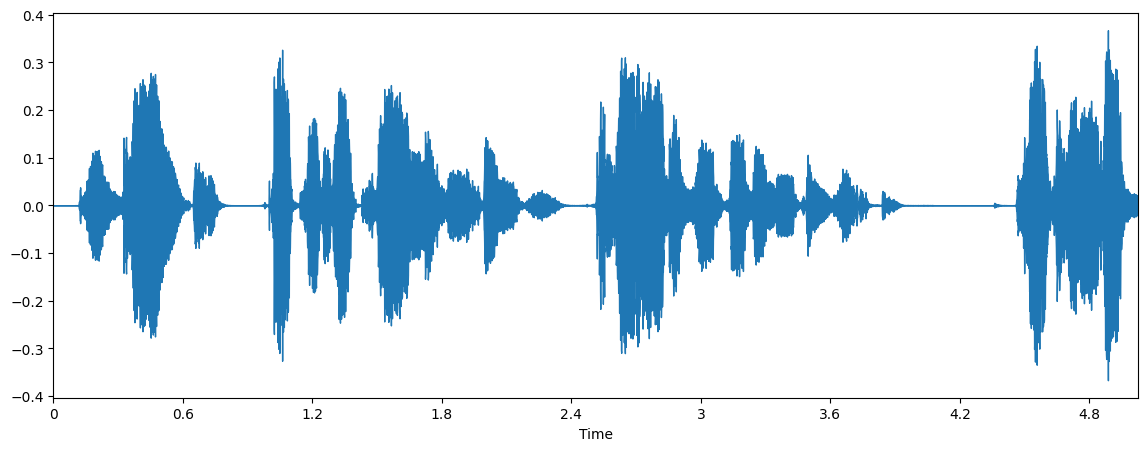

In [6]:
# x-axis has been converted to time using our sample rate. 
# matplotlib plt.plot(y), would output the same figure, but with sample 
# number on the x-axis instead of seconds
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples, sr=sample_rate)

In [7]:
from IPython.display import Audio
Audio(AUDIO_FILE)

In [8]:
print ('Example shape ', samples.shape, 'Sample rate ', sample_rate, 'Data type', type(samples))
print (samples[22400:22430])

Example shape  (241391,) Sample rate  48000 Data type <class 'numpy.ndarray'>
[-0.18487549 -0.16438293 -0.14466858 -0.12620544 -0.10939026 -0.09384155
 -0.07913208 -0.06521606 -0.05226135 -0.04029846 -0.02908325 -0.01855469
 -0.00912476 -0.00160217  0.00320435  0.00448608  0.00212097 -0.00234985
 -0.00648499 -0.0098114  -0.01403809 -0.01991272 -0.02600098 -0.03071594
 -0.03387451 -0.03619385 -0.03839111 -0.0403595  -0.04031372 -0.03646851]


C:\Users\merlab-jani\anaconda3\envs\voice_cloning_env\lib\site-packages\librosa\display.py:955: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  "Trying to display complex-valued input. " "Showing magnitude instead."


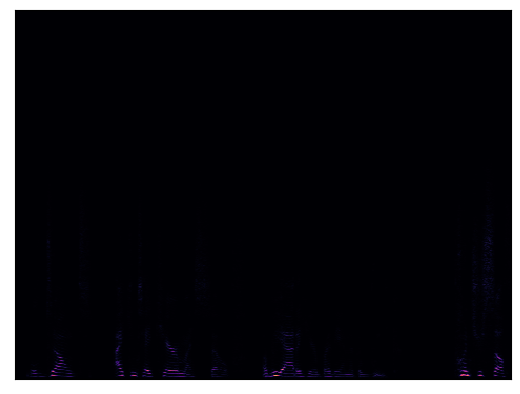

In [9]:
sgram = librosa.stft(samples)
librosa.display.specshow(sgram)

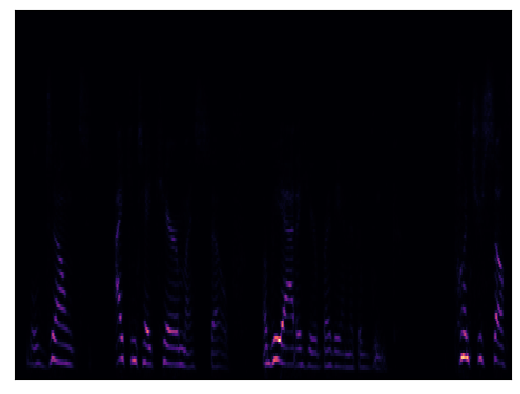

In [10]:
# use the mel-scale instead of raw frequency
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
librosa.display.specshow(mel_scale_sgram)

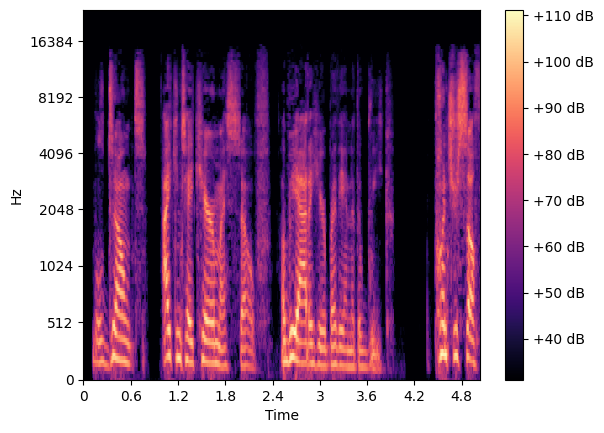

In [13]:
# use the decibel scale to get the final Mel Spectrogram
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')